In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
3009,2020-03-16,Mercer,New Jersey,34021.0,6,0
223933,2020-06-09,Chester,Tennessee,47023.0,12,0
407580,2020-08-06,Northampton,Pennsylvania,42095.0,3902,292
48002,2020-04-10,Hutchinson,Texas,48233.0,2,0
416867,2020-08-09,Davie,North Carolina,37059.0,422,5
228354,2020-06-11,Macoupin,Illinois,17117.0,46,2
267633,2020-06-23,Angelina,Texas,48005.0,415,6
128546,2020-05-09,Morrison,Minnesota,27097.0,13,0
260934,2020-06-21,Garfield,Oklahoma,40047.0,55,1
467285,2020-08-25,Dubois,Indiana,18037.0,804,17


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
21520,2020-03-30,Albemarle,Virginia,51003.0,19,0,2.0,2.43
19467,2020-03-29,Charlottesville city,Virginia,51540.0,12,0,0.0,1.14
21530,2020-03-30,Charlottesville city,Virginia,51540.0,13,0,1.0,1.29
227402,2020-06-10,Albemarle,Virginia,51003.0,260,8,2.0,8.00
414630,2020-08-08,Albemarle,Virginia,51003.0,833,16,16.0,13.14
190399,2020-05-29,Albemarle,Virginia,51003.0,180,8,10.0,5.43
424293,2020-08-11,Albemarle,Virginia,51003.0,848,16,6.0,8.29
356788,2020-07-21,Charlottesville city,Virginia,51540.0,367,8,6.0,8.14
283664,2020-06-28,Charlottesville city,Virginia,51540.0,209,3,9.0,5.71
61587,2020-04-15,Albemarle,Virginia,51003.0,53,0,3.0,1.71


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
1099,".Simpson County, Kentucky",18572.0,Simpson,Kentucky
120,".Clark County, Arkansas",22320.0,Clark,Arkansas
1373,".Polk County, Minnesota",31364.0,Polk,Minnesota
3079,".Lafayette County, Wisconsin",16665.0,Lafayette,Wisconsin
2278,".Lackawanna County, Pennsylvania",209674.0,Lackawanna,Pennsylvania
3037,".Taylor County, West Virginia",16695.0,Taylor,West Virginia
1031,".Gallatin County, Kentucky",8869.0,Gallatin,Kentucky
1832,".Cattaraugus County, New York",76117.0,Cattaraugus,New York
1519,".Gasconade County, Missouri",14706.0,Gasconade,Missouri
2321,".Barnwell County, South Carolina",20866.0,Barnwell,South Carolina


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
148,2020-08-16,Albemarle,Virginia,51003.0,906,16,16.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
149,2020-08-17,Albemarle,Virginia,51003.0,913,16,7.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
150,2020-08-18,Albemarle,Virginia,51003.0,916,16,3.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
151,2020-08-19,Albemarle,Virginia,51003.0,921,16,5.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
152,2020-08-20,Albemarle,Virginia,51003.0,930,16,9.0,8.71,".Albemarle County, Virginia",109330.0,7.966706
153,2020-08-21,Albemarle,Virginia,51003.0,943,16,13.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
154,2020-08-22,Albemarle,Virginia,51003.0,955,16,12.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
155,2020-08-23,Albemarle,Virginia,51003.0,961,16,6.0,7.86,".Albemarle County, Virginia",109330.0,7.189244
156,2020-08-24,Albemarle,Virginia,51003.0,963,16,2.0,7.14,".Albemarle County, Virginia",109330.0,6.530687
157,2020-08-25,Albemarle,Virginia,51003.0,975,16,12.0,8.43,".Albemarle County, Virginia",109330.0,7.710601


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
310,2020-08-16,Charlottesville city,Virginia,51540.0,560,15,2.0,2.57,".Charlottesville city, Virginia",47266.0,5.437312
311,2020-08-17,Charlottesville city,Virginia,51540.0,560,15,0.0,2.43,".Charlottesville city, Virginia",47266.0,5.141116
312,2020-08-18,Charlottesville city,Virginia,51540.0,561,15,1.0,2.14,".Charlottesville city, Virginia",47266.0,4.527567
313,2020-08-19,Charlottesville city,Virginia,51540.0,566,14,5.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
314,2020-08-20,Charlottesville city,Virginia,51540.0,570,14,4.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
315,2020-08-21,Charlottesville city,Virginia,51540.0,575,14,5.0,2.86,".Charlottesville city, Virginia",47266.0,6.050861
316,2020-08-22,Charlottesville city,Virginia,51540.0,584,14,9.0,3.71,".Charlottesville city, Virginia",47266.0,7.849194
317,2020-08-23,Charlottesville city,Virginia,51540.0,588,16,4.0,4.00,".Charlottesville city, Virginia",47266.0,8.462743
318,2020-08-24,Charlottesville city,Virginia,51540.0,589,16,1.0,4.14,".Charlottesville city, Virginia",47266.0,8.758939
319,2020-08-25,Charlottesville city,Virginia,51540.0,592,17,3.0,4.43,".Charlottesville city, Virginia",47266.0,9.372488


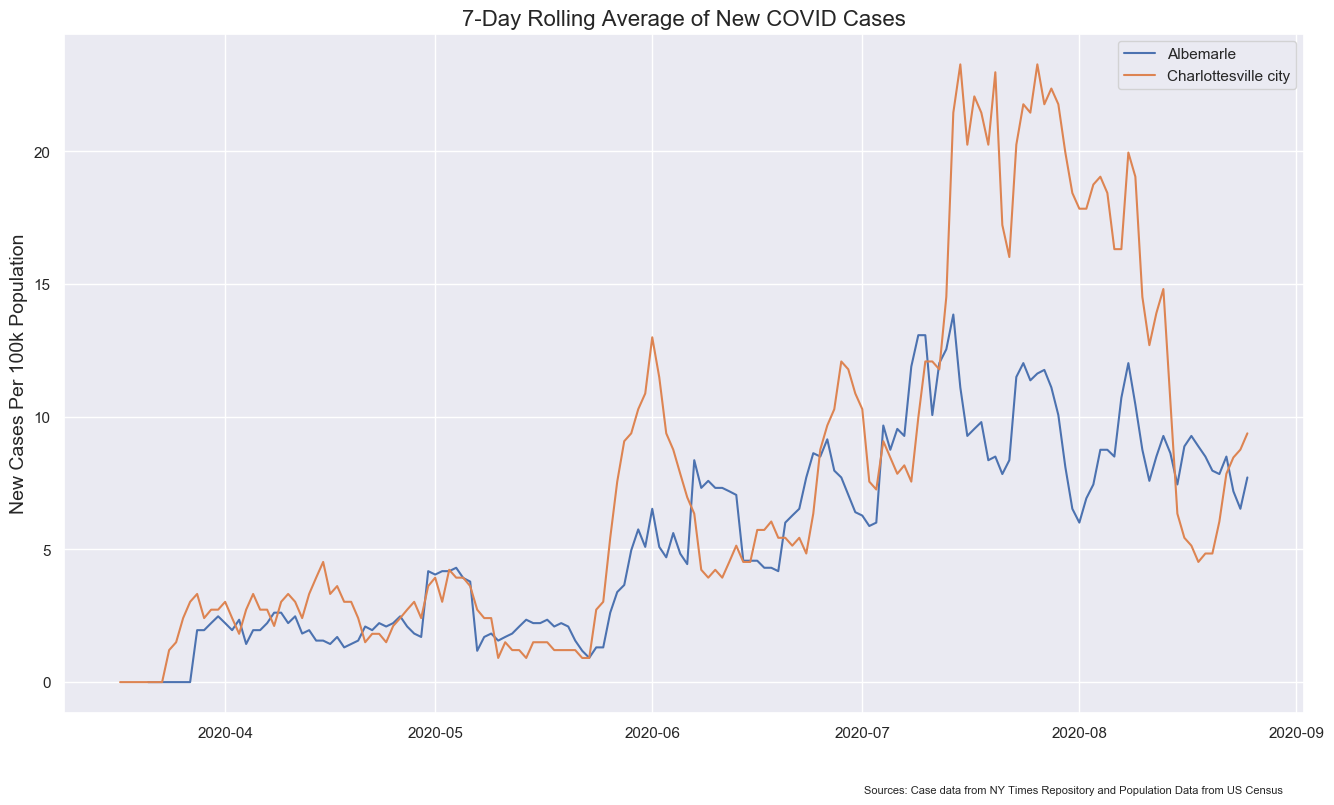

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')